In [122]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import os
from utilitaire import load_data


In [123]:
def initialisation(dimension):
    #Cette fonction iniatilise les variables w et b avec des valeurs aleatoires
    C = len(dimension)
    params = {}

    for c in range(1, C):
        params['w' + str(c)] = np.random.randn(dimension[c], dimension[c-1])
        params['b' + str(c)] = np.random.randn(dimension[c], 1)

    return params

In [124]:
def forward_propagation(X, params):

    A = {'a0': X}
    C = len(params)//2 

    for c in range(1, C+1):
        Z = params['w'+str(c)].dot(A['a'+str(c-1)]) +params['b'+str(c)]
        A['a'+str(c)] = 1/(1 + np.exp(-Z))

    return A

In [125]:
def cost_function(A, y):
    epsilon = 1e-15
    return 1/len(y)*np.sum(-y*np.log(A + epsilon) - (1 - y)*np.log(1 - A + epsilon))

In [126]:
def back_propagation(A, X, y, params):
    m  = y.shape[1]
    gradient = {}
    C = len(params)//2
    dz = A['a'+str(C)] - y

    for c in reversed(range(1, C + 1)):
        gradient['dw'+str(c)] = 1/m * np.dot(dz, A['a'+str(c-1)].T)
        gradient['db'+str(c)] = 1/m * np.sum(dz, axis=1, keepdims=True)
        if c > 1:
            dz = np.dot(params['w'+str(c)].T, dz) * A['a'+str(c-1)] * (1 - A['a'+str(c-1)])

    return gradient

In [127]:
def udpate(gradient, params, rate_learning):
    C = len(params)//2
    for c in range(1, C + 1):
        params['w'+str(c)] = params['w'+str(c)] - rate_learning * gradient['dw'+str(c)]
        params['b'+str(c)] = params['b'+str(c)] - rate_learning * gradient['db'+str(c)]

    return params


In [128]:
def prediction(X, params):
    A = forward_propagation(X, params)
    Cf = len(params)//2
    return A['a'+str(Cf)] >= 0.5

In [138]:
def neural_network(X, Y, hidden_layers ,nbr_iteration = 1000, rate_learning = 0.1):
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(Y.shape[0])
    params = initialisation(dimensions)

    Lg_train = []
    acc_train = []
    #Lg_test = []
    #acc_test = []
    cscore = 0

    for i in tqdm(range(nbr_iteration)):
        A = forward_propagation(X, params)   
        gradient = back_propagation(A, X, Y, params)  
        params = udpate(gradient, params, rate_learning)   
        if i % 10 == 0:
            #for train
            Cf = len(params)//2
            Lg_train.append(cost_function(A['a'+str(Cf)], Y))
            y_pred = prediction(X, params)
            score = accuracy_score(Y.flatten(), y_pred.flatten())
            acc_train.append(score)


            """A_t = forward_propagation(x, params)
            #for train
            Lg_test.append(cost_function(A_t['A2'], y))
            y_pred = prediction(x, params)
            ym = y.flatten()
            rate = accuracy_score(ym, y_pred.flatten()[:ym.shape[0]])
            acc_test.append(rate)"""
        


        
    print(score)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(Lg_train, label = 'Train Loss')
    #plt.plot(Lg_test, label = 'Test Loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(acc_train, label = 'Train Acc')
    #plt.plot(acc_test, label = 'Test Acc')
    plt.legend()
    plt.show()
    return params, score

In [130]:
def show_image(x):
    plt.figure(figsize=(18,8))
    for i in range(1, 15):
        plt.subplot(4, 5, i)
        plt.imshow(x[i])
        plt.tight_layout()
    plt.show()

In [131]:
def save_model(params):
    
    with open('./datasets/deep_model.data', 'wb') as file:
        myPickler  = pickle.Pickler(params)
        myPickler.dump(params)
        file.close()

In [132]:
def redimension(X_train, Y_train, X_test, Y_test):
    Y_train = Y_train.T
    Y_test = Y_test.T
    X_train =  X_train.T
    X_test = X_test.T

    X_train = X_train.reshape(-1, X_train.shape[-1])/X_train.max()
    X_test = X_test.reshape(-1, X_test.shape[-1])/X_test.max()

    m_train = 300
    m_test = 80

    X_train = X_train[:, :m_train]
    X_test = X_test[:, :m_test]
    Y_train = Y_train[:, :m_train]
    Y_test = Y_test[:, :m_test]

    return  X_train, Y_train, X_test, Y_test

In [133]:
X, y = make_circles(n_samples=100, random_state=0,  noise = 0.01)

y = y.reshape(y.shape[0], 1)

X = X.T
Y = y.T

In [108]:
Y = true(Y)
Y

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
    

100%|██████████| 1000/1000 [00:00<00:00, 1975.44it/s]


1.0


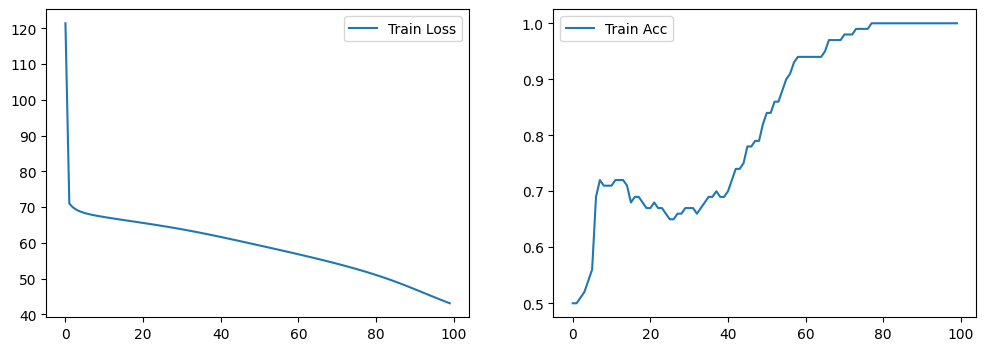

In [141]:
params = neural_network(X, Y, hidden_layers = (32, 32, 32))